In [ ]:
# Gerando Modelo de Machine Learning (Classificação)
# Preparação dos Dados e Treinamento do Modelo de Machine Learning - Parte 1.

In [ ]:
# Autor: Kelion Fernandes Aquino - Data: 23/09/2022 - Aula de Ciência de Dados - Mostrar pra mãe..

In [ ]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [7]:
#Carrega o dataset com os dados para o treinamento e validacao
df_coracao = pd.read_csv("heart.csv", encoding="utf-8")

In [10]:
# Visualização das primeiras linhas
df_coracao.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_coracao[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
#Definição do atributo de classificacao
data_classif = np.array(df_coracao['target'])

In [12]:
# Verificando o formato dos dados
data_treino.shape

(303, 13)

In [18]:
# Verificando as primeiras linhas do dataset
df_coracao.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [19]:
# Verificando as últimas linhas do dataset
df_coracao.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [20]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_coracao, size=10):
    corr = df_coracao.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

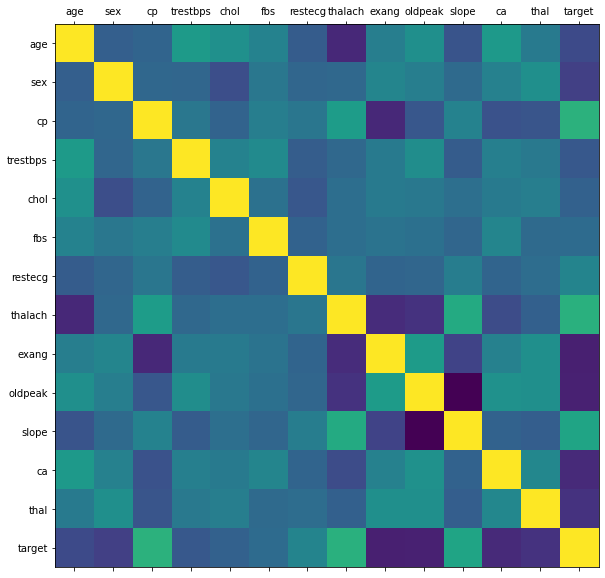

In [21]:
# Criando o gráfico
plot_corr(df_coracao)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

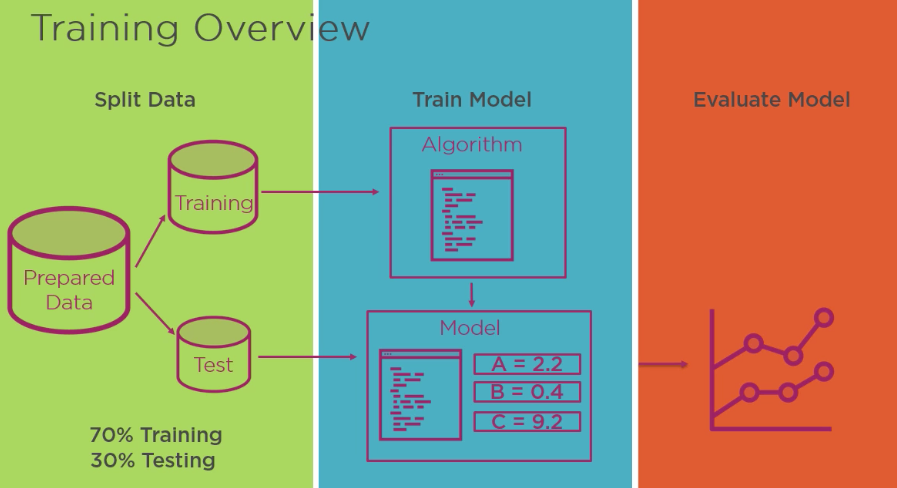

In [ ]:
from IPython.display import Image
Image('Treinamento.png')

In [22]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [23]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[60.  1.  2. ...  1.  0.  2.]
 [67.  1.  0. ...  1.  2.  2.]
 [77.  1.  0. ...  2.  3.  2.]
 ...
 [55.  0.  0. ...  1.  0.  2.]
 [58.  1.  0. ...  1.  2.  3.]
 [57.  1.  2. ...  2.  0.  2.]]
Conjunto de Validacao
[[68.  0.  2. ...  1.  0.  2.]
 [57.  0.  0. ...  2.  0.  2.]
 [44.  1.  0. ...  2.  1.  2.]
 ...
 [71.  0.  1. ...  2.  2.  2.]
 [41.  1.  1. ...  2.  0.  2.]
 [62.  1.  1. ...  1.  1.  3.]]
-----------------------


In [24]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_coracao.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_coracao.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [ ]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [38]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [39]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8679245283018868
Na Base de Treinamento


In [27]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.7802197802197802
na Base de Teste e ou Validação


In [28]:
from sklearn import metrics

In [ ]:
# Métricas

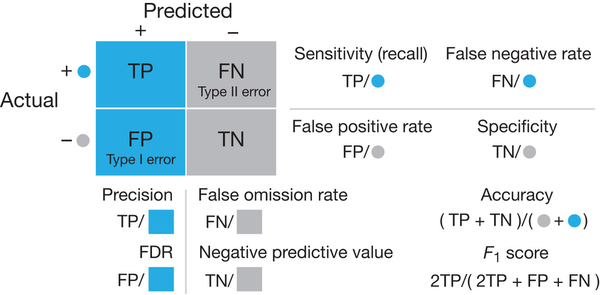

In [ ]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [29]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[37  8]
 [12 34]]

Classification Report
              precision    recall  f1-score   support

           1       0.76      0.82      0.79        45
           0       0.81      0.74      0.77        46

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [ ]:
# Criando uma Curva Roc
print("Roc Curve")

# Compute ROC curve and ROC area for each class
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(y_pred_val):
#    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_val)
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Roc Curve


In [ ]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [32]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [33]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.7912



In [34]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[37  8]
 [11 35]]

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.82      0.80        45
           0       0.81      0.76      0.79        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [35]:
# Regressão Logística
# Terceiro Algorítmo de Machine Learning de Classificação de Dados - 

In [36]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter=850)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [51]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.8022

Classification Report
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        45
           0       0.85      0.74      0.79        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
### Resumindo
## Exatidão nos dados Mamíferos de teste

# Modelo usando algoritmo Naive Bayes         = 0.8679  => Segunda Execução: 1.0
# Modelo usando algoritmo Random Forest       = 1.0000  => Segunda Execução: 1.0 
# Modelo usando algoritmo Regressão Logística = 0.8022  => Segunda Execução: 1.0